# DATA IMPORTING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Diwali = pd.read_csv("Diwali_Sales_Data.csv", encoding='latin1')
Diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Data Cleaning & Preparation 

# 1. Handle Blank Columns

In [3]:
Diwali = Diwali.drop(Diwali.columns[[13, 14]], axis=1)

In [4]:
Diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


# 2. check for missing values 

In [5]:
core_columns = ['User_ID', 'Gender', 'Age', 'Amount']
missing_values = Diwali[core_columns].isnull().sum()
print("Missing values in core columns:\n", missing_values)


Missing values in core columns:
 User_ID     0
Gender      0
Age         0
Amount     12
dtype: int64


In [4]:

Diwali['Amount'] = Diwali['Amount'].fillna(Diwali['Amount'].mean())
print("Missing values in 'Amount' after filling:", Diwali['Amount'].isnull().sum())


Missing values in 'Amount' after filling: 0


# 3. correcting data types 

In [7]:
print(Diwali.dtypes)

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object


In [8]:
Diwali['Age Group'] = pd.to_numeric(Diwali['Age Group'], errors='coerce')

# Verify the change
print("Data type of 'Age Group' after conversion:", Diwali['Age Group'].dtype)

Data type of 'Age Group' after conversion: float64


# 4. enchane readablilty 

In [9]:
Diwali['Marital_Status'] = Diwali['Marital_Status'].replace({0: 'Single', 1: 'Married'})
print(Diwali['Marital_Status'].value_counts())

Marital_Status
Single     6522
Married    4729
Name: count, dtype: int64


# : Exploratory Data Analysis 

# 1. GENDER DISTRIBUTION

In [10]:
gender_counts = Diwali['Gender'].value_counts()
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 Gender
F    7842
M    3409
Name: count, dtype: int64


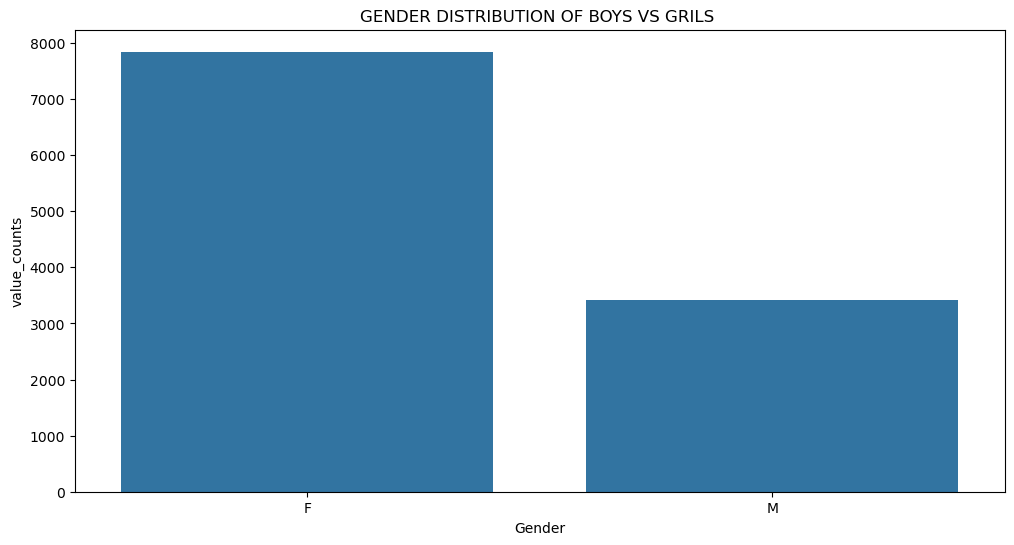

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=gender_counts.index, y=gender_counts.values,)
plt.title('GENDER DISTRIBUTION OF BOYS VS GRILS ')
plt.xlabel('Gender')
plt.ylabel('value_counts')
plt.show()

# 2. AGE DISTRIBUTION

In [12]:
# What is the distribution of shoppers across the different Age Groups? 

In [13]:
age_counts =Diwali["Age Group"].value_counts().sort_index()
age_counts

Series([], Name: count, dtype: int64)

In [14]:
# Which Age Group is the most represented? 

# 3. Geographic Distribution

In [15]:
# the state with highset number of shoppers
state_counts = Diwali['State'].value_counts()
top_state = state_counts.idxmax()
top_state_count = state_counts.max()
print(f"State with the highest number of shoppers: {top_state} ({top_state_count} shoppers)")

State with the highest number of shoppers: Uttar Pradesh (1946 shoppers)


In [16]:
# the zone with highset number of shoppers

In [17]:
zone_counts = Diwali['Zone'].value_counts()
top_zone = zone_counts.idxmax()
top_zone_count = zone_counts.max()
print(f"Zone with the highest number of shoppers: {top_zone} ({top_zone_count} shoppers)")

Zone with the highest number of shoppers: Central (4296 shoppers)


# 4. MARTIAL STATUS 

In [18]:
marital_counts = Diwali['Marital_Status'].value_counts()
print("Marital Status Distribution:\n", marital_counts)

Marital Status Distribution:
 Marital_Status
Single     6522
Married    4729
Name: count, dtype: int64


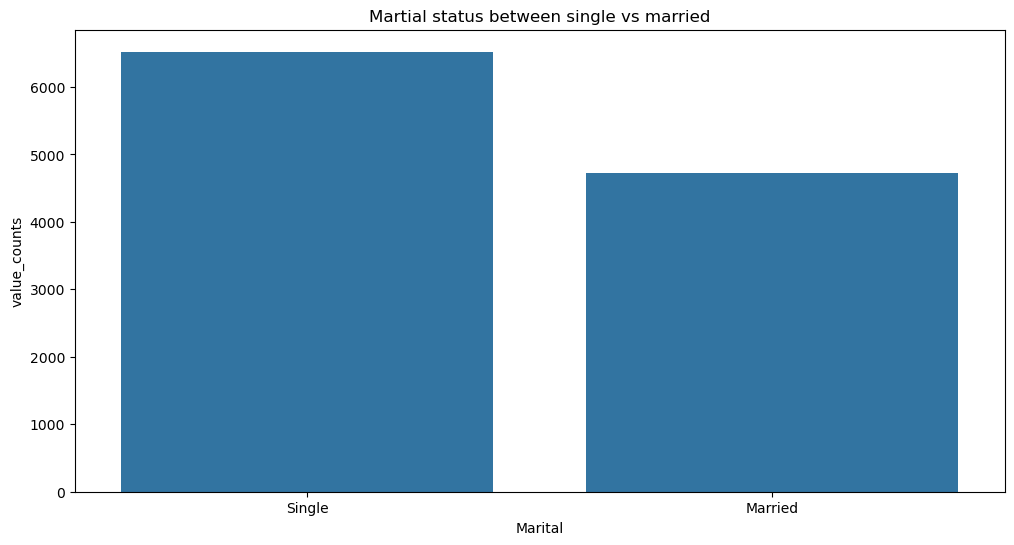

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=marital_counts.index, y=marital_counts.values,)
plt.title('Martial status between single vs married')
plt.xlabel('Marital')
plt.ylabel('value_counts')
plt.show()

# 5.Occupations

In [20]:
# What are the top 5 most common Occupations of your customers? 
top_occupations = Diwali['Occupation'].value_counts().head(5)
print("Top 5 Most Common Occupations:\n", top_occupations)

Top 5 Most Common Occupations:
 Occupation
IT Sector     1588
Healthcare    1408
Aviation      1310
Banking       1139
Govt           854
Name: count, dtype: int64


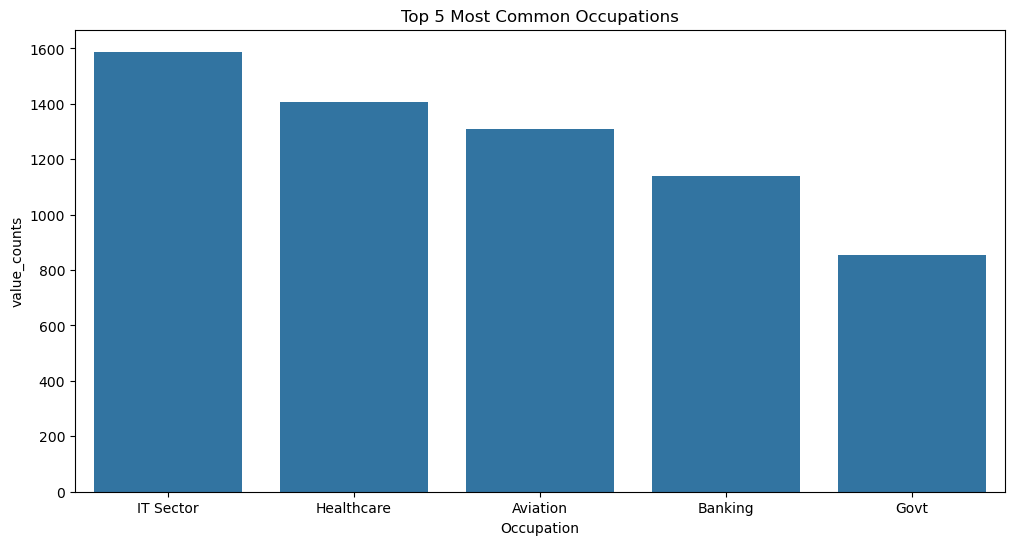

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_occupations.index, y=top_occupations.values,)
plt.title('Top 5 Most Common Occupations')
plt.xlabel('Occupation')
plt.ylabel('value_counts')
plt.show()

# : In-Depth Analysis (Connecting Customers to Sales) 

# 1.Spending by Gender

In [22]:
# Calculate average purchase Amount for each Gender
average_by_gender = Diwali.groupby('Gender')['Amount'].mean()
print("\nAverage Purchase Amount by Gender:\n", average_by_gender)

# Determine who spends more on average
if average_by_gender['M'] > average_by_gender['F']:
    print("\nMen spend more on average.")
else:
    print("\nWomen spend more on average.")


Average Purchase Amount by Gender:
 Gender
F    9491.251280
M    9367.023532
Name: Amount, dtype: float64

Women spend more on average.


# 2.Spending by Age & Gender

In [3]:
# Combine Age Group and Gender
Diwali['Age_Gender'] = Diwali.apply(lambda x: f"{x['Age Group']} {x['Gender']}", axis=1)
print(Diwali[['Age Group', 'Gender', 'Age_Gender']].head())



  Age Group Gender Age_Gender
0     26-35      F    26-35 F
1     26-35      F    26-35 F
2     26-35      F    26-35 F
3      0-17      M     0-17 M
4     26-35      M    26-35 M


# 3.Top States by Sales

In [24]:
# Top 10 states by total sales Amount
top_states = Diwali.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 States by Total Sales Amount:\n", top_states)

Top 10 States by Total Sales Amount:
 State
Uttar Pradesh       1.939388e+07
Maharashtra         1.443700e+07
Karnataka           1.353299e+07
Delhi               1.163218e+07
Madhya Pradesh      8.120049e+06
Andhra Pradesh      8.046601e+06
Himachal Pradesh    4.963368e+06
Haryana             4.220175e+06
Bihar               4.022757e+06
Gujarat             3.964989e+06
Name: Amount, dtype: float64


# 4.Marital Status & Spending

In [25]:
marital_spending = Diwali.groupby('Marital_Status')['Amount'].sum()
print("Total Amount Spent by Marital Status:\n", marital_spending)

Total Amount Spent by Marital Status:
 Marital_Status
Married    4.419937e+07
Single     6.216320e+07
Name: Amount, dtype: float64


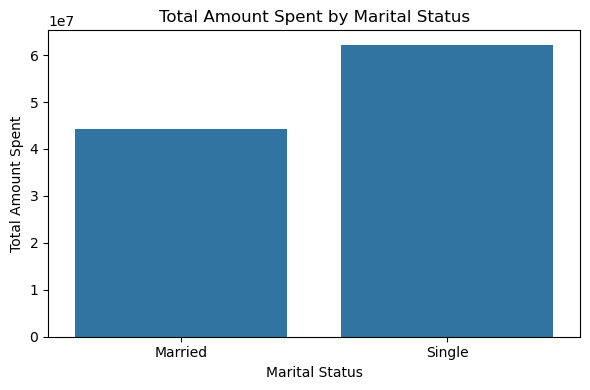

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x=marital_spending.index, y=marital_spending.values)
plt.title('Total Amount Spent by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5.Spending by Occupation

In [27]:
# Top 5 occupations by total sales Amount
top_5_occupations = Diwali.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Occupations by Total Sales Amount:\n", top_5_occupations)

Top 5 Occupations by Total Sales Amount:
 Occupation
IT Sector     1.480235e+07
Healthcare    1.303459e+07
Aviation      1.260230e+07
Banking       1.078952e+07
Govt          8.517212e+06
Name: Amount, dtype: float64


# 6.Top Product Categories: 

In [ ]:
top_revenue_category = Diwali.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
print("Product Category by Total Revenue:\n", top_revenue_category)
print(f"\nProduct_Category with the most revenue: {top_revenue_category.idxmax()} ({top_revenue_category.max()})")


In [29]:
top_orders_category = Diwali['Product_Category'].value_counts()
print("\nProduct Category by Number of Orders:\n", top_orders_category)
print(f"\nProduct_Category with the highest number of orders: {top_orders_category.idxmax()} ({top_orders_category.max()})")


Product Category by Number of Orders:
 Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

Product_Category with the highest number of orders: Clothing & Apparel (2655)


# Synthesis & Recommendations 

# 1.Summarize Your Key Findings

# 2.Provide Recommendations